# Ad-Hoc Reporting

Utilize your `sqlite3` and `pandas` knowledge to query your database and generate visualizations! 

After completing your report, answer the 4 analytical questions below. Remember that we expect comprehensive numerical detail! 

In [341]:
import sqlite3

import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

In [342]:
# TODO: Set up a connection the "Market.db" database
connection = sqlite3.connect("db/Market.db")

# TODO: Set up the cursor
cursor = connection.cursor()

### Question 1 : Total Products Less than €10
How many products in our Products table cost less than 10 EUR?

**Hint**: You can apply an aggregate function to an entire table.

In [343]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""
    SELECT COUNT(*) 
    FROM Products
    WHERE Price < 10
""")
rows = cursor.fetchall()
print(rows)

[(11,)]


### Question 2 : Most Frequent Country by Supplier

What is the most common country of origin in our Suppliers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [373]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""        
    SELECT Country, COUNT(Country) as count
    FROM Suppliers 
    GROUP BY Country 
    ORDER BY count DESC 
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('USA', 4), ('Germany', 3), ('France', 3), ('UK', 2), ('Sweden', 2), ('Japan', 2), ('Italy', 2), ('Canada', 2), ('Australia', 2), ('Spain', 1), ('Singapore', 1), ('Norway', 1), ('Netherlands', 1), ('Finland', 1), ('Denmark', 1), ('Brazil', 1)]


Text(0.5, 1.0, 'Supplier counts by Country of Origin')

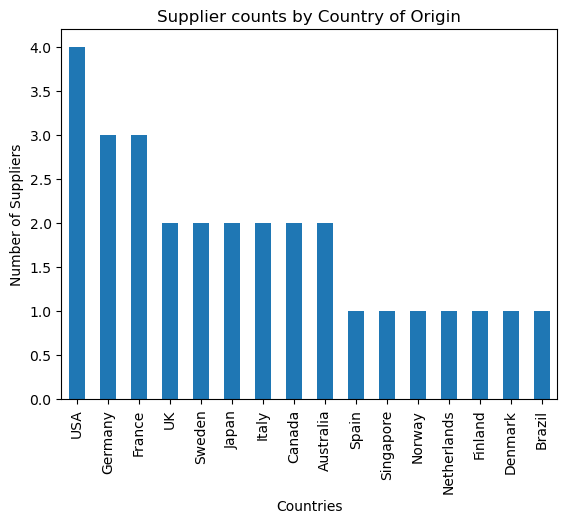

In [374]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['Country','count'])

# TODO: Generate a visualization on this dataframe
df.plot.bar(x = 'Country', y ='count', legend = False)
plt.xlabel('Countries')
plt.ylabel('Number of Suppliers')
plt.title('Supplier counts by Country of Origin')

In [375]:
df.head()

,Country,count
0,USA,4
1,Germany,3
2,France,3
3,UK,2
4,Sweden,2


### Question 3 : Most Frequent Country by Customer

What is the most common country of origin in our Customers table? Sort your output in descending order.

**Hint**: `GROUP BY` can be used to calculate grouped aggregates.

In [370]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""        
    SELECT COUNT(Country) AS counts, Country 
    FROM Customers
    GROUP BY Country 
    ORDER BY counts DESC
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[(13, 'USA'), (11, 'Germany'), (11, 'France'), (9, 'Brazil'), (7, 'UK'), (5, 'Spain'), (5, 'Mexico'), (4, 'Venezuela'), (3, 'Italy'), (3, 'Canada'), (3, 'Argentina'), (2, 'Switzerland'), (2, 'Sweden'), (2, 'Portugal'), (2, 'Finland'), (2, 'Denmark'), (2, 'Belgium'), (2, 'Austria'), (1, 'Poland'), (1, 'Norway'), (1, 'Ireland')]


Text(0.5, 1.0, 'Most common countries among customers')

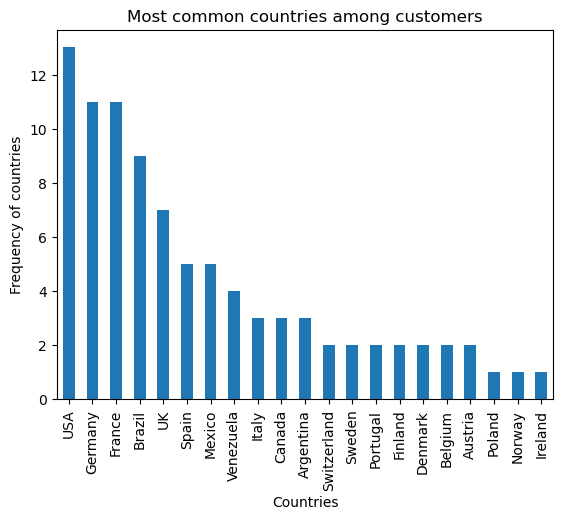

In [371]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['counts', 'Country'])

# TODO: Generate a visualization on this dataframe
df.plot.bar(x = 'Country', y = 'counts',legend = False )
plt.xlabel("Countries")
plt.ylabel('Frequency of countries')
plt.title('Most common countries among customers')

In [372]:
df.head()

,counts,Country
0,13,USA
1,11,Germany
2,11,France
3,9,Brazil
4,7,UK


### Question 4 : Least Popular Products by Quantity

What are the least popular products by order quantity? Limit your output to the bottom 20 products. Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [348]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""        
    SELECT p.ProductName, SUM(d.Quantity) AS pop_total
    FROM OrderDetails AS d 
    LEFT JOIN Products AS p 
        ON d.ProductID = p.ProductID
    GROUP BY d.ProductID
    ORDER BY pop_total ASC
    LIMIT 20
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 5), ('Røgede sild', 15), ("Gustaf's Knäckebröd", 18), ('Mishi Kobe Niku', 20), ("Uncle Bob's Organic Dried Pears", 25), ('Genen Shouyu', 25), ('Queso Manchego La Pastora', 27), ("Grandma's Boysenberry Spread", 36), ('Gravad lax', 39), ('Röd Kaviar', 45), ('Filo Mix', 48), ('Mascarpone Fabioli', 52), ('Chocolade', 70), ('Valkoinen suklaa', 70), ('NuNuCa Nuß-Nougat-Creme', 71), ('Singaporean Hokkien Fried Mee', 77), ('Aniseed Syrup', 80), ('Ikura', 85), ('Schoggi Schokolade', 90), ('Louisiana Hot Spiced Okra', 90)]


Text(0.5, 1.0, 'Least popular products by order quantity')

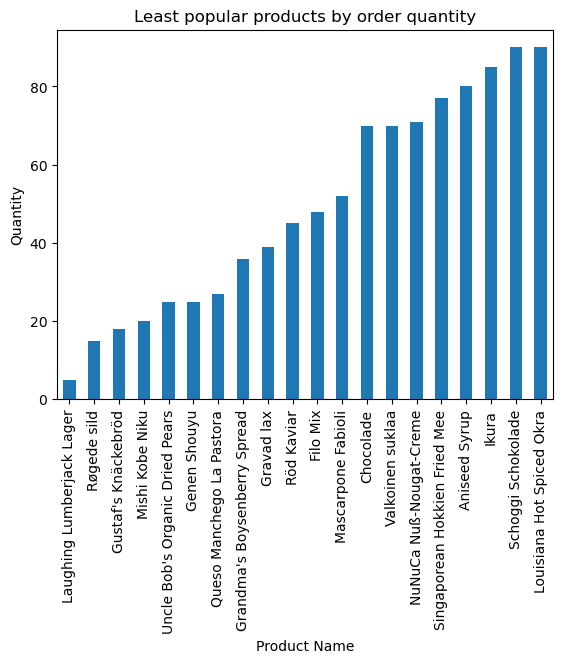

In [349]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['ProductName', 'Quantity'])

# TODO: Generate a visualization on this dataframe
df.plot.bar(x = "ProductName", y = 'Quantity', legend = False)
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.title('Least popular products by order quantity')

In [350]:
df.head()

,ProductName,Quantity
0,Laughing Lumberjack Lager,5
1,Røgede sild,15
2,Gustaf's Knäckebröd,18
3,Mishi Kobe Niku,20
4,Uncle Bob's Organic Dried Pears,25


### Question 5 : Least Popular Products by Revenue

What are the least popular products by **total revenue** (order quantity * price)? Sort this table in ascending order and be sure to include the product name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [351]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute("""        
    SELECT p.ProductName, SUM(Quantity * price) AS total_revenue
    FROM OrderDetails AS d 
    LEFT JOIN Products AS p 
        ON d.ProductID = p.ProductID
    GROUP BY d.ProductID
    ORDER BY total_revenue ASC
    LIMIT 20
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Laughing Lumberjack Lager', 70), ('Røgede sild', 142.5), ('Filo Mix', 336), ("Gustaf's Knäckebröd", 378), ('Genen Shouyu', 387.5), ('Konbu', 552), ('Röd Kaviar', 675), ('Guaraná Fantástica', 711.0), ("Uncle Bob's Organic Dried Pears", 750), ('Geitost', 790.0), ('Aniseed Syrup', 800), ('Chocolade', 892.5), ("Grandma's Boysenberry Spread", 900), ('Zaanse koeken', 959.5), ('NuNuCa Nuß-Nougat-Creme', 994), ('Gravad lax', 1014), ('Queso Manchego La Pastora', 1026), ('Singaporean Hokkien Fried Mee', 1078), ('Rhönbräu Klosterbier', 1116.0), ('Valkoinen suklaa', 1137.5)]


Text(0.5, 1.0, 'Least popular products by total revenue')

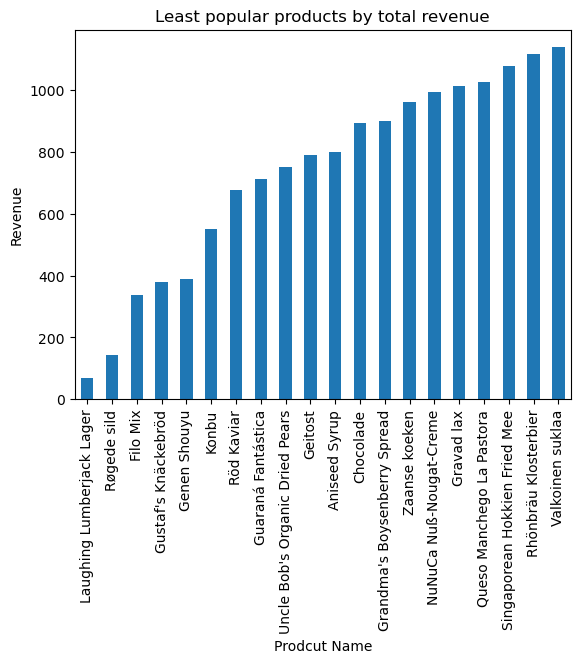

In [352]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns= ["ProductName", 'Quantity'])

# TODO: Generate a visualization on this dataframe
df.plot.bar(x = "ProductName", y = "Quantity", legend = False)
plt.xlabel('Prodcut Name')
plt.ylabel('Revenue')
plt.title('Least popular products by total revenue')

In [353]:
df.head()

,ProductName,Quantity
0,Laughing Lumberjack Lager,70.0
1,Røgede sild,142.5
2,Filo Mix,336.0
3,Gustaf's Knäckebröd,378.0
4,Genen Shouyu,387.5


### Question 6 : Countries with the Most Orders

Which country's have placed the most orders? For each country, list its' name in your output and visualizations.

**Hint**: You will have to perform a join to calculate this answer.

In [354]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute( """
    SELECT c.Country, SUM(o.OrderID) AS total
    FROM Orders AS o
    LEFT JOIN Customers AS c
        ON o.CustomerID = c.CustomerID
    GROUP BY c.Country
    ORDER BY total DESC            
""")

# TODO: Fetch your list of tuples and print it out
rows= cursor.fetchall()
print(rows)

[('USA', 299970), ('Germany', 258370), ('Brazil', 196296), ('France', 186181), ('Austria', 134861), ('UK', 124304), ('Canada', 93551), ('Venezuela', 92972), ('Mexico', 92800), ('Finland', 82702), ('Italy', 72560), ('Sweden', 72345), ('Spain', 72290), ('Ireland', 62124), ('Portugal', 51846), ('Denmark', 41524), ('Switzerland', 41298), ('Belgium', 20554), ('Argentina', 10409), ('Norway', 10387), ('Poland', 10374)]


Text(0.5, 1.0, 'Countries with most placed orders')

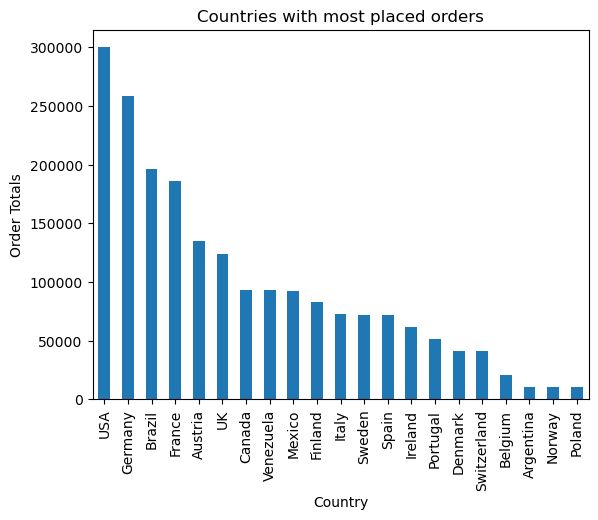

In [355]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns = ["Country", 'total'])

# TODO: Generate a visualization on this dataframe
df.plot.bar(x = 'Country', y = 'total', legend = False)
plt.xlabel('Country')
plt.ylabel('Order Totals')
plt.title('Countries with most placed orders')

In [356]:
df.head()

,Country,total
0,USA,299970
1,Germany,258370
2,Brazil,196296
3,France,186181
4,Austria,134861


### Question 7 : Countries with Customers Who Do Not Order

Which countries have at least one customer who has placed **no** orders? Count up the total number of customers who have placed no orders for each respective country. For each country, list its' name in your output and visualizations.

**Hint**: A join is necessary. We can also check if a column is `NULL` using the `IS` keyword.

In [357]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute( """
    SELECT Country, COUNT(Country) AS total
    FROM Customers AS c
    LEFT JOIN Orders AS o
        ON c.CustomerID = o.CustomerID
    WHERE OrderID IS NULL
    GROUP BY Country
    ORDER BY Country ASC               
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Argentina', 2), ('Belgium', 1), ('Canada', 1), ('France', 4), ('Germany', 2), ('Spain', 1), ('UK', 1), ('USA', 5)]


Text(0.5, 1.0, 'Countries with customers who have placed no orders')

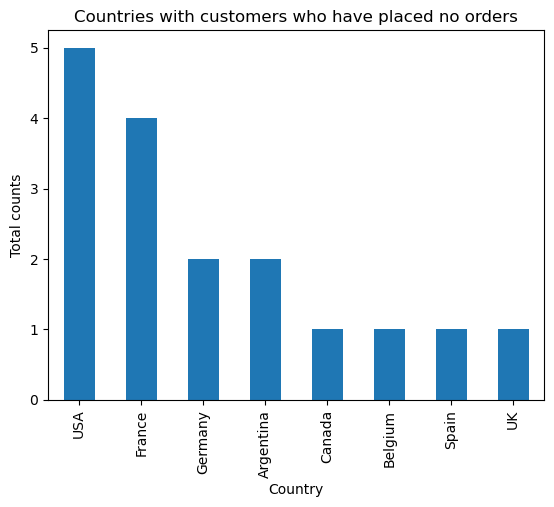

In [358]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns= ['Country', 'total'])
df = df.sort_values(by = 'total', ascending  = False)

# TODO: Generate a visualization on this dataframe
df.plot.bar(x = 'Country', y = 'total', legend = False)
plt.xlabel('Country')
plt.ylabel('Total counts')
plt.title('Countries with customers who have placed no orders')

In [359]:
df.head()

,Country,total
7,USA,5
3,France,4
4,Germany,2
0,Argentina,2
2,Canada,1


### Question 8 : Most Popular Suppliers

What are the most popular suppliers according to order count? List the supplier names and their number of orders. Sort your output in descending order.

**Hint**: You might need to use a subquery to join more than 2 tables together.

In [376]:
# TODO: Write a SQL query which will answer the question above.
cursor.execute(""" 
    SELECT SupplierName, COUNT(od.OrderID) AS totals
    FROM Suppliers AS s
    LEFT JOIN Products AS p
        ON s.SupplierID = p.SupplierID
    LEFT JOIN OrderDetails AS od 
        ON p.ProductID = od.ProductID
    GROUP BY SupplierName
    ORDER BY totals DESC             
""")

# TODO: Fetch your list of tuples and print it out
rows = cursor.fetchall()
print(rows)

[('Plutzer Lebensmittelgroßmärkte AG', 42), ('Pavlova, Ltd.', 40), ('Specialty Biscuits, Ltd.', 33), ('Norske Meierier', 32), ('Formaggi Fortini s.r.l.', 31), ('Gai pâturage', 26), ('Exotic Liquid', 21), ('Pasta Buttini s.r.l.', 20), ('New Orleans Cajun Delights', 20), ('Ma Maison', 19), ('Karkki Oy', 19), ("G'day, Mate", 19), ('New England Seafood Cannery', 17), ("Mayumi's", 17), ('Leka Trading', 17), ('Bigfoot Breweries', 16), ('Heli Süßwaren GmbH & Co. KG', 15), ("Forêts d'érables", 15), ('Aux joyeux ecclésiastiques', 15), ('Svensk Sjöföda AB', 14), ('Tokyo Traders', 12), ('Refrescos Americanas LTDA', 11), ("Cooperativa de Quesos 'Las Cabras'", 11), ('Nord-Ost-Fisch Handelsgesellschaft mbH', 8), ('Lyngbysild', 8), ('PB Knäckebröd AB', 6), ("Grandma Kelly's Homestead", 6), ('Zaanse Snoepfabriek', 4), ('Escargots Nouveaux', 4)]


Text(0.5, 1.0, 'Most popular suppliers by order count')

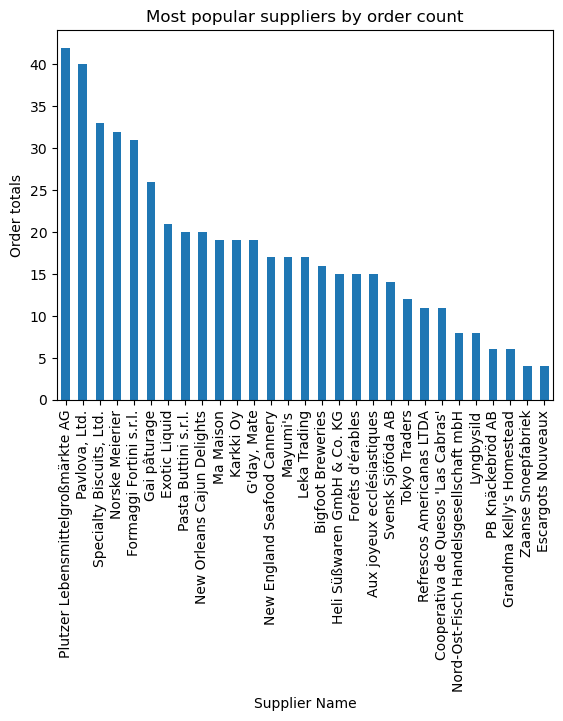

In [377]:
# TODO: Convert your list of tuples to a dataframe
df = pd.DataFrame(rows, columns=['SupplierName', 'total'])

# TODO: Generate a visualization on this dataframe
df.plot.bar( x = 'SupplierName', y = 'total',legend = False)
plt.xlabel('Supplier Name')
plt.ylabel('Order totals')
plt.title('Most popular suppliers by order count')

In [378]:
df.head()

,SupplierName,total
0,Plutzer Lebensmittelgroßmärkte AG,42
1,"Pavlova, Ltd.",40
2,"Specialty Biscuits, Ltd.",33
3,Norske Meierier,32
4,Formaggi Fortini s.r.l.,31


## Report

Answer the following analytical questions using numerical evidence.

### Question 1

Which countries have the greatest number of customers? How does this correlate with the number of suppliers by country (i.e. do more customers lead to less or more suppliers)? Which evidence supports your answer?

The country with the greatest number of customers is the United States of America (USA) with a total of 13 customers. Germany and France follow closely, each having 11 customers. As shown in our visualization from Question 2, we can observe that the countries with the most suppliers are also the USA with 4 suppliers while Germany and France each have 3 suppliers. This finding suggests that there is a potential correlation between that number of customers and suppliers in a country. 
However, it is important to mention that although our top three customers and suppliers both hold this trend to be true, Brazil has 9 customers but is not a common country amongst suppliers. For this reason, our findings indicate that there may be a correlation with the number of suppliers by countries but it may be a weak one. 



### Question 2

What is the least popular product by order quantity? How does this correlate with revenue (i.e. do less popular products by quantity lead to less or more revenue)? Which evidence supports your answer?

The least popular product by order quantity is the Laughing Lumberjack Lager. Our visualization above in Question 4 depicts this with the product only having five orders. This finding aligns with the product revenue depicted in Question 5 amounting to only $70 which is a trend we can observe among less popular products by quantity leading to less revenue. 

### Question 3

Which country has the most orders? How does this correlate with the number of customers who do not order (i.e. do countries with more ordering customers have more or less non-ordering customers)? Which evidence supports your answer?

According to our visualization in Question 6 we can observe that the country with the most orders is the United States of America (USA) with Germany and Brazil leading behind. The USA has a total of about 299,970 orders while Germany has 258,370 and Brazil has 196296 orders. In Question 7 we can observe almost a similar trend. In the visualization in Question 7 we learn that the USA has a total of 5 customers who have placed while France holds 4 customers that have not placed an order. This may indicate that there is not much correlation between the counties with most ordering customers having less non-ordering customers. 


### Question 4

Which supplier has the most orders? Which evidence supports your answer?

The supplier with the most orders is Plutzer Lebensmittelgroßmärkte AG holding the highest number of orders at 42 as depicted in the visualization in Question 8.
